In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_load = nib.load('/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/OAS2_0001_MR1/RAW/mpr-1.nifti.img').get_fdata()
test_load.shape

(256, 256, 128, 1)

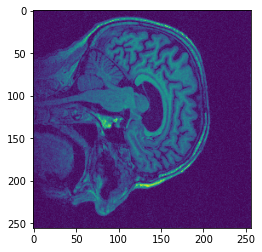

In [ ]:
test = test_load[:,:,59].squeeze()
plt.imshow(test)
plt.show()

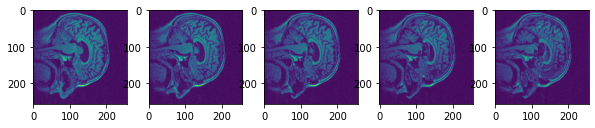

In [ ]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow((test_load[:,:,59 + i].squeeze()))
    plt.gcf().set_size_inches(10, 10)
plt.show()


In [ ]:
import torch

from torchvision import transforms

from PIL import Image

convert_tensor = transforms.ToTensor()

tens = convert_tensor(test_load.squeeze())
tens.size()

torch.Size([128, 256, 256])

In [ ]:
tens

tensor([[[ 33., 167., 203.,  ..., 223., 197., 139.],
         [160., 164., 112.,  ...,  49., 107., 147.],
         [106., 123., 123.,  ..., 143., 173.,  91.],
         ...,
         [163.,  73., 140.,  ...,  64., 115.,  81.],
         [ 88., 155.,  41.,  ...,  65.,  20., 152.],
         [ 89., 164., 111.,  ..., 105., 117.,  50.]],

        [[117., 156.,  94.,  ..., 157., 137.,  93.],
         [215., 112., 188.,  ...,  90.,  99., 221.],
         [212., 118., 230.,  ..., 150.,  99.,  26.],
         ...,
         [100., 168.,  78.,  ..., 140.,  90., 153.],
         [126., 159., 169.,  ..., 125., 110., 278.],
         [ 47., 198.,  47.,  ..., 192.,  80.,  70.]],

        [[ 81., 249., 184.,  ...,  91.,  45., 180.],
         [148., 103.,  16.,  ..., 185.,  33.,  41.],
         [168., 124.,  35.,  ..., 142., 246., 118.],
         ...,
         [ 95., 224.,  75.,  ..., 122.,  47.,  84.],
         [108.,  55.,  98.,  ..., 120., 110., 115.],
         [ 54., 204., 114.,  ..., 209., 197., 370.]],

In [ ]:
import glob
for filename in glob.glob("/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/OAS2_0001_MR1" + '/*.img', recursive=True):
  test_load = nib.load(filename)
  test = test_load[:,:,59].squeeze()
  plt.imshow(test)
  plt.show()

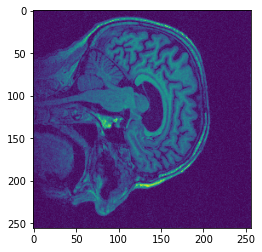

In [ ]:
test_load = nib.load('/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/OAS2_0001_MR1/RAW/mpr-1.nifti.img').get_fdata()
test = test_load[:,:,59].squeeze()
plt.imshow(test)
plt.show()



In [ ]:
for i in range(128):
    plt.subplot(256, 256, i + 1)
    plt.imshow((test_load[:,:,i].squeeze()))
    plt.gcf().set_size_inches(400, 400)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
import glob
import shutil
import os
src = r'/content/drive/MyDrive/OASIS2/OASIS CONSOLIDATED'
dest = r'/content/drive/MyDrive/OASIS2/OAS2_RAW_PART_HOLD/Consolidated_hold'
shutil.copytree(src, dest)

In [ ]:
import glob
import shutil
import os
from pathlib import Path
RootDir1 = r'/content/drive/MyDrive/OASIS2/OAS2_RAW_PART_HOLD'
TargetFolder = r'/content/drive/MyDrive/OASIS2/OASIS_CONSOLIDATED'
for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            if name.endswith('.img'):
                src_dir = os.path.normpath(RootDir1) 
                SourceFolder = os.path.join(root,name)
                person = Path(SourceFolder).parts[6]
                listOfStrings = [person,'-' , name]
                fileString = "".join(listOfStrings)
                print(fileString)
                #print(os.path.split(os.path.dirname(SourceFolder))[-2])
                #print (TargetFolder + root + name)
                shutil.move(SourceFolder,os.path.join(TargetFolder,fileString))
                #SourceFolder = os.path.join(root,name)

                #shutil.copy2(SourceFolder, TargetFolder) #copies csv to new folder


In [ ]:
import glob
import shutil
import os
from pathlib import Path
import csv

RootDir1 =  r'/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1'

with open('/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/Oasis_Demo.csv' , 'w') as f:
  writer = csv.writer(f)
  for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
          for name in files:
              if name.endswith('.img'):
                  src_dir = os.path.normpath(RootDir1) 
                  SourceFolder = os.path.join(root,name)
                  person = Path(SourceFolder).parts[6]
                  listOfStrings = [person,'_' , name]
                  fileString = "".join(listOfStrings)
                  print(SourceFolder)
                  writer.writerow([SourceFolder])


In [ ]:
import glob
import shutil
import os
RootDir1 = r'/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1'
os.listdir(RootDir1)

In [ ]:
mean = 0.
meansq = 0.
std = 0.
i = 0
for images, _ in my_dataloader:
    mean += images
    meansq += torch.square(images)
    i += 1
    print(i)

mean //= len(my_dataloader)
std = torch.sqrt((meansq / len(my_dataloader))  - torch.square(mean))

In [ ]:
#std.size()
mean.size()

In [ ]:
torch.save(mean,"/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/mean_t.pt")
torch.save(std, "/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/std_t.pt")

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
mean = torch.load("/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/mean_t.pt")
std = torch.load( "/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/std_t.pt")
mean.reshape(256,256,128)
mean.size()

torch.Size([1, 256, 256, 128])

In [5]:
import pandas as pd
my_dataframe = pd.read_csv("/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/Oasis_Demo_2 - Oasis_Demo.csv")

from torch.utils.data import Dataset
from PIL import Image
from torchvision import models, transforms
import cv2

class createDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.transform = transforms.Compose([transforms.Normalize(torch.reshape(mean,(256,256,128,1)), torch.reshape(std,(256,256,128,1))), transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip()])

    def __getitem__(self, index):
        image = self.dataframe.iloc[index, 0]
        image = nib.load(image).get_fdata()  
        image = torch.from_numpy(np.asarray(image))
        image = image.double()
        image = self.transform(image)
        #image = image.squeeze()
        image = image.double()

        label = self.dataframe.iloc[index, 1]
        label = torch.from_numpy(np.array(label, dtype='int32'))
        return image, label

    def __len__(self):
        return self.dataframe.shape[0]
        
      
my_dataset = createDataset(dataframe = my_dataframe)

from torch.utils.data import DataLoader

my_dataloader = DataLoader(dataset = my_dataset, batch_size=3, shuffle = True, )

In [ ]:
test_load = nib.load('/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/OAS2_0001_MR1/RAW/mpr-1.nifti.img').get_fdata()
test_load.shape
img = torch.from_numpy(test_load)
torch.reshape(img, (-1,)).size()

torch.Size([8388608])

In [ ]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=256):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(256, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 1)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 1)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 1)
        print(out.shape)
        out = out.view(-1,1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layer1 = self._conv_layer_set(256, 32)
        self.conv_layer2 = self._conv_layer_set(32, 64)
        self.fc1 = nn.Linear(119040, 128)
        self.fc2 = nn.Linear(128, 3)
        self.relu = nn.LeakyReLU()
        self.batch=nn.BatchNorm1d(128)
        self.drop=nn.Dropout(p=0.15)        
        
    def _conv_layer_set(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=(3, 3), padding=0),
        nn.LeakyReLU(),
        nn.MaxPool2d((2, 2)),
        )
        return conv_layer
    

    def forward(self, x):
        # Set 1
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.batch(out)
        out = self.drop(out)
        out = self.fc2(out)
        
        return out

In [ ]:
model = CNNModel().double()
print(model)


CNNModel(
  (conv_layer1): Sequential(
    (0): Conv2d(256, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=119040, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.15, inplace=False)
)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.1, momentum = 0.9)
num_epochs = 2

cpu


In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(my_dataloader):
        
        train = Variable(images).to(device)
        labels = Variable(labels).to(device)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        train = train.squeeze()
        outputs = model(train)
        # Calculate softmax and ross entropy loss
        loss = criterion(outputs, labels.long())
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in my_dataloader:
                
                test = Variable(images)
                test = test.squeeze()
                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 173.3256108747528  Accuracy: 39.72201919555664 %


In [17]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
mean = torch.load("/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/mean_t.pt")
std = torch.load( "/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/std_t.pt")
mean.reshape(256,256,128)
mean.size()

torch.Size([1, 256, 256, 128])

In [19]:
import pandas as pd
my_dataframe = pd.read_csv("/content/drive/MyDrive/OASIS2/OAS2_RAW_PART1/Oasis_Demo_2 - Oasis_Demo.csv")

from torch.utils.data import Dataset
from PIL import Image
from torchvision import models, transforms
import cv2

class createDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.transform = transforms.Compose([transforms.Normalize(torch.reshape(mean,(256,256,128,1)), torch.reshape(std,(256,256,128,1))), transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip()])

    def __getitem__(self, index):
        image = self.dataframe.iloc[index, 0]
        image = nib.load(image).get_fdata()  
        image = torch.from_numpy(np.asarray(image))
        image = image.double()
        image = self.transform(image)
        #image = image.squeeze()
        image = image.double()

        label = self.dataframe.iloc[index, 1]
        label = torch.from_numpy(np.array(label, dtype='int32'))
        return image, label

    def __len__(self):
        return self.dataframe.shape[0]
        
      
my_dataset = createDataset(dataframe = my_dataframe)

from torch.utils.data import DataLoader

my_dataloader = DataLoader(dataset = my_dataset, batch_size=3, shuffle = True, )

In [6]:
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        if downsample:
            self.conv1 = nn.Conv2d(
                in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(
                in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.shortcut = nn.Sequential()

        self.conv2 = nn.Conv2d(out_channels, out_channels,
                               kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = input + shortcut
        return nn.ReLU()(input)
class ResBottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        self.downsample = downsample
        self.conv1 = nn.Conv2d(in_channels, out_channels//4,
                               kernel_size=1, stride=1)
        self.conv2 = nn.Conv2d(
            out_channels//4, out_channels//4, kernel_size=3, stride=2 if downsample else 1, padding=1)
        self.conv3 = nn.Conv2d(out_channels//4, out_channels, kernel_size=1, stride=1)

        if self.downsample or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1,
                          stride=2 if self.downsample else 1),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Sequential()

        self.bn1 = nn.BatchNorm2d(out_channels//4)
        self.bn2 = nn.BatchNorm2d(out_channels//4)
        self.bn3 = nn.BatchNorm2d(out_channels)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = nn.ReLU()(self.bn3(self.conv3(input)))
        input = input + shortcut
        return nn.ReLU()(input)

In [7]:
class ResNet(nn.Module):
    def __init__(self, in_channels, resblock, repeat, useBottleneck=False, outputs=1000):
        super().__init__()
        self.layer0 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        if useBottleneck:
            filters = [64, 256, 512, 1024, 2048]
        else:
            filters = [64, 64, 128, 256, 512]

        self.layer1 = nn.Sequential()
        self.layer1.add_module('conv2_1', resblock(filters[0], filters[1], downsample=False))
        for i in range(1, repeat[0]):
                self.layer1.add_module('conv2_%d'%(i+1,), resblock(filters[1], filters[1], downsample=False))

        self.layer2 = nn.Sequential()
        self.layer2.add_module('conv3_1', resblock(filters[1], filters[2], downsample=True))
        for i in range(1, repeat[1]):
                self.layer2.add_module('conv3_%d' % (
                    i+1,), resblock(filters[2], filters[2], downsample=False))

        self.layer3 = nn.Sequential()
        self.layer3.add_module('conv4_1', resblock(filters[2], filters[3], downsample=True))
        for i in range(1, repeat[2]):
            self.layer3.add_module('conv2_%d' % (
                i+1,), resblock(filters[3], filters[3], downsample=False))

        self.layer4 = nn.Sequential()
        self.layer4.add_module('conv5_1', resblock(filters[3], filters[4], downsample=True))
        for i in range(1, repeat[3]):
            self.layer4.add_module('conv3_%d'%(i+1,),resblock(filters[4], filters[4], downsample=False))

        self.gap = torch.nn.AdaptiveAvgPool2d(1)
        self.fc = torch.nn.Linear(filters[4], outputs)

    def forward(self, input):
        input = self.layer0(input)
        input = self.layer1(input)
        input = self.layer2(input)
        input = self.layer3(input)
        input = self.layer4(input)
        input = self.gap(input)
        # torch.flatten()
        # https://stackoverflow.com/questions/60115633/pytorch-flatten-doesnt-maintain-batch-size
        input = torch.flatten(input, start_dim=1)
        input = self.fc(input)

        return input

In [22]:
from torchsummary import summary

resnet18 = ResNet(256, ResBlock, [2, 2, 2, 2], useBottleneck=False, outputs=1000)
resnet18.to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
summary(resnet18, (256, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]         802,880
         MaxPool2d-2           [-1, 64, 56, 56]               0
       BatchNorm2d-3           [-1, 64, 56, 56]             128
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,928
       BatchNorm2d-6           [-1, 64, 56, 56]             128
            Conv2d-7           [-1, 64, 56, 56]          36,928
       BatchNorm2d-8           [-1, 64, 56, 56]             128
          ResBlock-9           [-1, 64, 56, 56]               0
           Conv2d-10           [-1, 64, 56, 56]          36,928
      BatchNorm2d-11           [-1, 64, 56, 56]             128
           Conv2d-12           [-1, 64, 56, 56]          36,928
      BatchNorm2d-13           [-1, 64, 56, 56]             128
         ResBlock-14           [-1, 64,

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr= 0.1, momentum = 0.9)
num_epochs = 2
resnet18 = resnet18.double()

In [24]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


In [27]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(my_dataloader):
        
        train = Variable(images).to(device)
        labels = Variable(labels).to(device)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        train = train.squeeze()
        outputs = resnet18(train)
        # Calculate softmax and ross entropy loss
        loss = criterion(outputs, labels.long())
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        
        count += 1
        print(count)
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in my_dataloader:
                
                test = Variable(images).to(device)
                test = test.squeeze()
                labels = Variable(labels).to(device)

                # Forward propagation
                outputs = resnet18(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
                print(count)
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Streaming output truncated to the last 5000 lines.
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
4

In [28]:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 912  Loss: 1.5944033532003703  Accuracy: 50.475494384765625 %


In [8]:
from torchsummary import summary

resnet152 = ResNet(256, ResBottleneckBlock, [
                   3, 8, 36, 3], useBottleneck=True, outputs=1000)
resnet152.to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
summary(resnet152, (256, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]         802,880
         MaxPool2d-2           [-1, 64, 56, 56]               0
       BatchNorm2d-3           [-1, 64, 56, 56]             128
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 256, 56, 56]          16,640
       BatchNorm2d-6          [-1, 256, 56, 56]             512
            Conv2d-7           [-1, 64, 56, 56]           4,160
       BatchNorm2d-8           [-1, 64, 56, 56]             128
            Conv2d-9           [-1, 64, 56, 56]          36,928
      BatchNorm2d-10           [-1, 64, 56, 56]             128
           Conv2d-11          [-1, 256, 56, 56]          16,640
      BatchNorm2d-12          [-1, 256, 56, 56]             512
ResBottleneckBlock-13          [-1, 256, 56, 56]               0
           Conv2d-14           [-1, 64

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet152.parameters(), lr= 0.1, momentum = 0.9)
num_epochs = 2
resnet152 = resnet152.double()

In [10]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(my_dataloader):
        
        train = Variable(images).to(device)
        labels = Variable(labels).to(device)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        train = train.squeeze()
        outputs = resnet152(train)
        # Calculate softmax and ross entropy loss
        loss = criterion(outputs, labels.long())
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        
        count += 1
        print(count)
        if count % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in my_dataloader:
                
                test = Variable(images).to(device)
                test = test.squeeze()
                labels = Variable(labels).to(device)

                # Forward propagation
                outputs = resnet152(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
                print(count)
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 250 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
